# Cviƒçenie 5

<object data="https://miroslava.matejova.website.tuke.sk/IE/IE/cvicenie5.pdf" type="application/pdf" width="700px" height="700px">
    <embed src="https://miroslava.matejova.website.tuke.sk/IE/IE/cvicenie5.pdf">
        <p> Cviƒçenie v PDF dostupn√©: <a href="https://miroslava.matejova.website.tuke.sk/IE/IE/cvicenie5.pdf">TU!</a></p>
    </embed>
</object>

## Almonovej model

Ako prv√© potrebujeme pero a papier :)

Naƒç√≠tame si d√°ta USMacroG a vytvor√≠me model pre predikovanie dpi podƒæa atrib√∫tu
consumption s ƒçasov√Ωm oknom M=3 a veƒækos≈•ou polyn√≥mu K=2. Najprv skonvertujeme
ƒçasov√© rady na ƒç√≠seln√© vektory.

In [1]:
install.packages("AER", repos='http://cran.us.r-project.org')  # after restart kernel

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
data("USMacroG", package="AER")

In [2]:
y = as.numeric(USMacroG[,"dpi"])
x = as.numeric(USMacroG[,"consumption"])

Vytvor√≠me si vektory pre posunut√© atrib√∫ty $x_t$, $x_{t-1}$, $x_{t-2}$, $x_{t-3}$ a $y_t$:

In [3]:
N = length(x)
x_t3 = x[1:(N-3)]
x_t2 = x[2:(N-2)]
x_t1 = x[3:(N-1)]
x_t = x[4:N]
y_t = y[4:N]

Vypoƒç√≠tame si transformovan√© atrib√∫ty $z_0$, $z_1$, $z_2$:

In [4]:
z0 = x_t + x_t1 + x_t2 + x_t3
z1 = x_t1 + (2*x_t2) + (3*x_t3)
z2 = x_t1 + (4*x_t2) + (9*x_t3)

Pomocou funkcie lm si vypoƒç√≠tame parametre $a_0$, $a_1$, $a_2$. Pre model bez posunu je potrebn√©
vo v√Ωraze `lm` zada≈• medzi z√°visl√© parametre 0.

In [5]:
td = data.frame(y_t, z0, z1, z2)
td_lm = lm(y_t ~ 0 + z0 + z1 + z2, td)
td_lm
alfa = as.numeric(coefficients(td_lm))
alfa


Call:
lm(formula = y_t ~ 0 + z0 + z1 + z2, data = td)

Coefficients:
     z0       z1       z2  
 0.3646  -0.7737   0.3081  


[1]  0.3646208 -0.7737486  0.3080595

Z parametrov $a_0$, $a_1$, $a_2$ sp√§tne vypoƒç√≠tame $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$:

In [6]:
beta0 = alfa[1]
beta1 = alfa[1] + alfa[2] + alfa[3]
beta2 = alfa[1] + 2*alfa[2] + 4*alfa[3]
beta3 = alfa[1] + 3*alfa[2] + 9*alfa[3]
beta0
beta1
beta2
beta3

[1] 0.3646208

[1] -0.1010682

[1] 0.04936178

[1] 0.8159109

## Koyckov model

In [8]:
install.packages("dynlm")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [9]:
library("dynlm")

Loading required package: zoo


Attaching package: ‚Äòzoo‚Äô


The following objects are masked from ‚Äòpackage:base‚Äô:

    as.Date, as.Date.numeric




In [10]:
model = dynlm(dpi ~ consumption + L(dpi,1), USMacroG)
model


Time series regression with "ts" data:
Start = 1950(2), End = 2000(4)

Call:
dynlm(formula = dpi ~ consumption + L(dpi, 1), data = USMacroG)

Coefficients:
(Intercept)  consumption    L(dpi, 1)  
    13.8383       0.0958       0.9172  


# √ölohy

1. Vytvorte Almonovej model s ƒçasov√Ωm oknom M=5 a polyn√≥mom stup≈àa K=3 pre
predikovanie ƒçasov√©ho radu `dpi` na z√°klade radu `consumption`. Vypoƒç√≠tajte
predikciu modelu na tr√©novac√≠ch d√°tach a zobrazte skutoƒçn√∫ hodnotu `dpi` a
predikovan√∫ hodnotu na spoloƒçnom grafe.

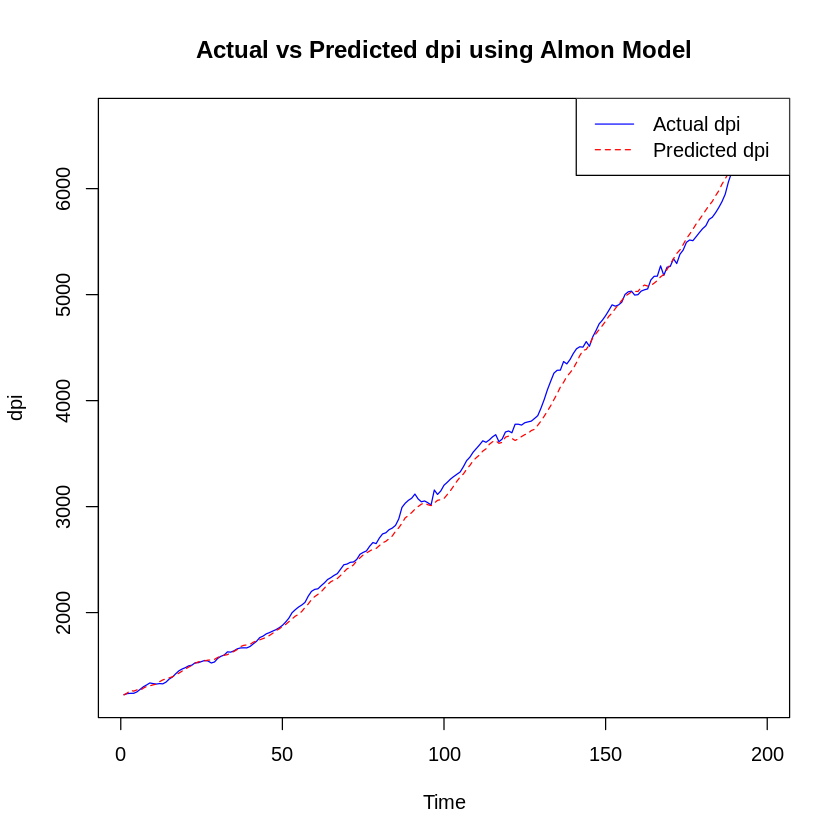

In [16]:
y = as.numeric(USMacroG[,"dpi"])
x = as.numeric(USMacroG[,"consumption"])

N = length(x)
x_t5 = x[1:(N-5)]
x_t4 = x[2:(N-4)]
x_t3 = x[3:(N-3)]
x_t2 = x[4:(N-2)]
x_t1 = x[5:(N-1)]
x_t = x[6:N]
y_t = y[6:N]

z0 = x_t + x_t1 + x_t2 + x_t3 + x_t4 + x_t5
z1 = x_t1 + (2*x_t2) + (3*x_t3) + (4*x_t4) + (5*x_t4)
z2 = x_t1 + (2^2*x_t2) + (3^2*x_t3) + (4^2*x_t4) + (5^2*x_t4)
z3 = x_t1 + (2^3*x_t2) + (3^3*x_t3) + (4^3*x_t4) + (5^3*x_t4)
z4 = x_t1 + (2^4*x_t2) + (3^4*x_t3) + (4^4*x_t4) + (5^4*x_t4)

td = data.frame(y_t, z0, z1, z2, z3, z4)
td_lm = lm(y_t ~ 0 + z0 + z1 + z2 + z3 + z4, td)
alfa = as.numeric(coefficients(td_lm))

beta0 = alfa[1]
beta1 = alfa[1] + alfa[2] + alfa[3] + alfa[4]
beta2 = alfa[1] + 2*alfa[2] + 4*alfa[3] + 8*alfa[4]
beta3 = alfa[1] + 3*alfa[2] + 9*alfa[3] + 27*alfa[4]
beta4 = alfa[1] + 4*alfa[2] + 16*alfa[3] + 64*alfa[4]
beta5 = alfa[1] + 5*alfa[2] + 25*alfa[3] + 125*alfa[4]

# Predict using the model
y_pred <- predict(td_lm, newdata = td)

# Plot actual vs predicted values
plot(y_t, type = "l", col = "blue", ylab = "dpi", xlab = "Time", main = "Actual vs Predicted dpi using Almon Model")
lines(y_pred, col = "red", lty = 2)
legend("topright", legend = c("Actual dpi", "Predicted dpi"), col = c("blue", "red"), lty = c(1, 2))

2. Vypoƒç√≠tajte korelaƒçn√∫ maticu medzi atrib√∫tmi $x_t$, $x_{t-1}$, $x_{t-2}$, $x_{t-3}$, $x_{t-4}$, $x_{t-5}$ z
predch√°dzaj√∫ceho pr√≠kladu a vyhodno≈•te, ktor√© dvojice s√∫ silno korelovan√©.

In [18]:
lagged_data <- data.frame(x_t, x_t1, x_t2, x_t3, x_t4, x_t5)

# Vypoƒç√≠tanie korelaƒçnej matice
cor_matrix <- cor(lagged_data)

# Zobrazenie korelaƒçnej matice
print(cor_matrix)

           x_t      x_t1      x_t2      x_t3      x_t4      x_t5
x_t  1.0000000 0.9998932 0.9997348 0.9995143 0.9992277 0.9989238
x_t1 0.9998932 1.0000000 0.9998911 0.9997291 0.9995052 0.9992154
x_t2 0.9997348 0.9998911 1.0000000 0.9998870 0.9997244 0.9994992
x_t3 0.9995143 0.9997291 0.9998870 1.0000000 0.9998822 0.9997176
x_t4 0.9992277 0.9995052 0.9997244 0.9998822 1.0000000 0.9998817
x_t5 0.9989238 0.9992154 0.9994992 0.9997176 0.9998817 1.0000000


3. Vytvorte ≈°tandardn√Ω autoregresn√Ω model pre predikovanie ƒçasov√©ho radu `dpi` na
z√°klade `consumption` s ƒçasov√Ωm oknom M=5:

ùë¶ùë° = ùõΩ0ùë•ùë° + ùõΩ1ùë•ùë°‚àí1 + ùõΩ2ùë•ùë°‚àí2 + ùõΩ3ùë•ùë°‚àí3 + ùõΩ4ùë•ùë°‚àí4 + ùõΩ5ùë•ùë°‚àí5

Porovnajte presnos≈• modelu s Almonovej modelom. Porovnajte vypoƒç√≠tan√©
koeficienty podƒæa ≈°tandardn√©ho modelu a po Almonovej transform√°cii.

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: sandwich

Loading required package: survival



Koeficienty ≈°tandardn√©ho autoregresn√©ho modelu:
 0.4355208 0.1571475 -0.1620477 0.0187232 0.2400035 0.4446524 

Koeficienty Almonovho modelu:
 0.446629 0.1335056 0.08531486 0.9505651 3.377764 8.015421 

MSE ≈°tandardn√©ho modelu: 9359.711 
MSE Almonovho modelu: 9360.487 


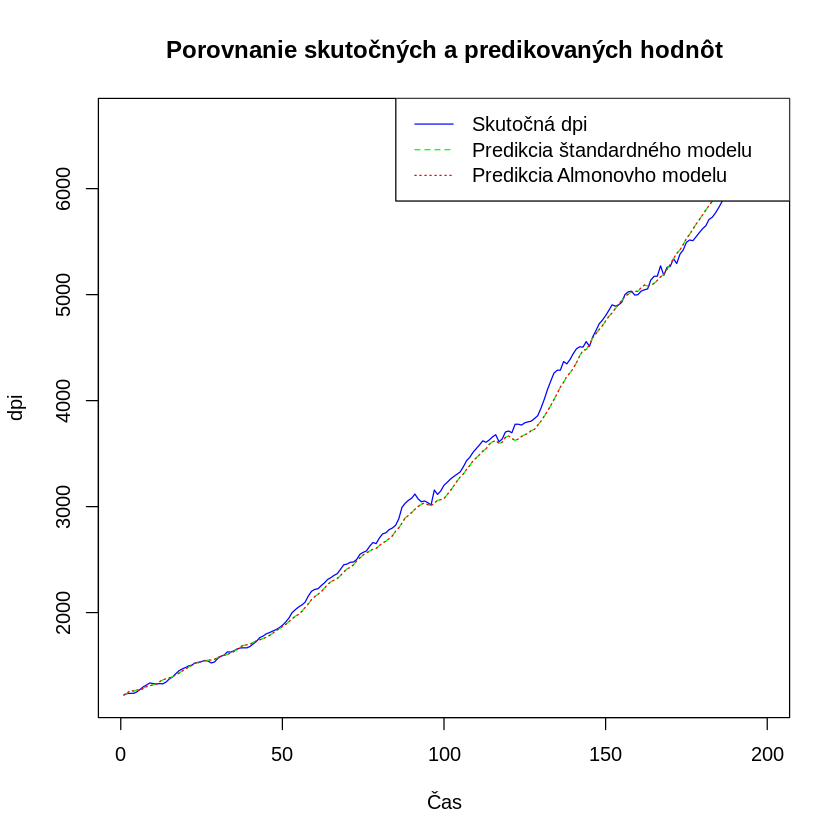

In [19]:
# Naƒç√≠tanie potrebn√©ho bal√≠ka a d√°t
library(AER)
data("USMacroG", package = "AER")

# Pr√≠prava d√°t
y <- as.numeric(USMacroG[,"dpi"])
x <- as.numeric(USMacroG[,"consumption"])

N <- length(x)
x_t5 <- x[1:(N-5)]
x_t4 <- x[2:(N-4)]
x_t3 <- x[3:(N-3)]
x_t2 <- x[4:(N-2)]
x_t1 <- x[5:(N-1)]
x_t <- x[6:N]
y_t <- y[6:N]

# Vytvorenie ≈°tandardn√©ho autoregresn√©ho modelu
std_data <- data.frame(y_t, x_t, x_t1, x_t2, x_t3, x_t4, x_t5)
std_model <- lm(y_t ~ 0 + x_t + x_t1 + x_t2 + x_t3 + x_t4 + x_t5, data = std_data)
std_coef <- coef(std_model)

# Predikcia a v√Ωpoƒçet MSE pre ≈°tandardn√Ω model
y_pred_std <- predict(std_model, newdata = std_data)
mse_std <- mean((y_t - y_pred_std)^2)

# V√Ωpoƒçet Almonovho modelu
z0 <- x_t + x_t1 + x_t2 + x_t3 + x_t4 + x_t5
z1 <- x_t1 + 2*x_t2 + 3*x_t3 + 4*x_t4 + 5*x_t5
z2 <- x_t1 + (2^2)*x_t2 + (3^2)*x_t3 + (4^2)*x_t4 + (5^2)*x_t5
z3 <- x_t1 + (2^3)*x_t2 + (3^3)*x_t3 + (4^3)*x_t4 + (5^3)*x_t5
z4 <- x_t1 + (2^4)*x_t2 + (3^4)*x_t3 + (4^4)*x_t4 + (5^4)*x_t5

# Almonov model
td <- data.frame(y_t, z0, z1, z2, z3, z4)
almon_model <- lm(y_t ~ 0 + z0 + z1 + z2 + z3 + z4, data = td)
alfa <- as.numeric(coefficients(almon_model))

# V√Ωpoƒçet koeficientov Almonovho modelu
beta0 <- alfa[1]
beta1 <- alfa[1] + alfa[2] + alfa[3] + alfa[4]
beta2 <- alfa[1] + 2*alfa[2] + 4*alfa[3] + 8*alfa[4]
beta3 <- alfa[1] + 3*alfa[2] + 9*alfa[3] + 27*alfa[4]
beta4 <- alfa[1] + 4*alfa[2] + 16*alfa[3] + 64*alfa[4]
beta5 <- alfa[1] + 5*alfa[2] + 25*alfa[3] + 125*alfa[4]
almon_coef <- c(beta0, beta1, beta2, beta3, beta4, beta5)

# Predikcia a v√Ωpoƒçet MSE pre Almonov model
y_pred_almon <- predict(almon_model, newdata = td)
mse_almon <- mean((y_t - y_pred_almon)^2)

# V√Ωsledky
cat("Koeficienty ≈°tandardn√©ho autoregresn√©ho modelu:\n", std_coef, "\n\n")
cat("Koeficienty Almonovho modelu:\n", almon_coef, "\n\n")
cat("MSE ≈°tandardn√©ho modelu:", mse_std, "\n")
cat("MSE Almonovho modelu:", mse_almon, "\n")

# Grafick√© porovnanie predikovan√Ωch hodn√¥t
plot(y_t, type = "l", col = "blue", ylab = "dpi", xlab = "ƒåas", main = "Porovnanie skutoƒçn√Ωch a predikovan√Ωch hodn√¥t")
lines(y_pred_std, col = "green", lty = 2)
lines(y_pred_almon, col = "red", lty = 3)
legend("topright", legend = c("Skutoƒçn√° dpi", "Predikcia ≈°tandardn√©ho modelu", "Predikcia Almonovho modelu"), 
       col = c("blue", "green", "red"), lty = c(1, 2, 3))


4. Vytvorte Koyckov model pre predikciu ƒçasov√©ho radu `gdp` od hodnoty `invest`.
Vypoƒç√≠tajte predikciu modelu na tr√©novac√≠ch d√°tach a zobrazte ich na spoloƒçnom
grafe s priebehom `gdp`.


Time series regression with "ts" data:
Start = 1950(2), End = 2000(4)

Call:
dynlm(formula = gdp ~ invest + L(gdp, 1), data = USMacroG)

Coefficients:
(Intercept)       invest    L(gdp, 1)  
    28.7358       0.1476       0.9807  


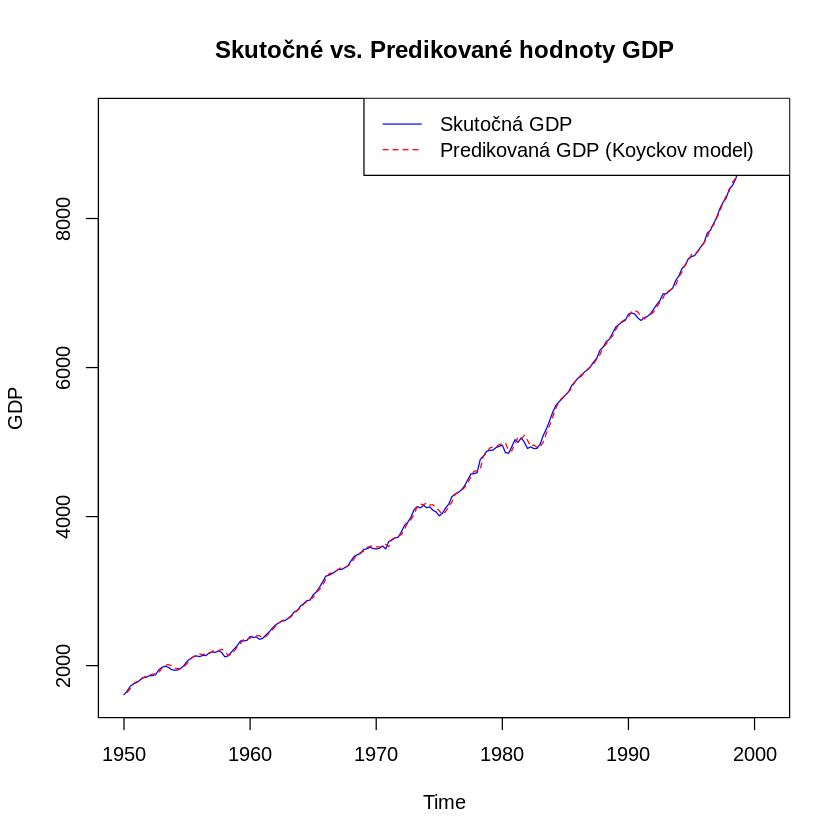

In [24]:
model = dynlm(gdp ~ invest + L(gdp,1), USMacroG)
model

# Predikcia na tr√©novac√≠ch d√°tach
gdp_pred <- fitted(model)

# Zobrazenie skutoƒçn√Ωch a predikovan√Ωch hodn√¥t na grafe
plot(USMacroG[,'gdp'], type = "l", col = "blue", ylab = "GDP", xlab = "Time", main = "Skutoƒçn√© vs. Predikovan√© hodnoty GDP")
lines(gdp_pred, col = "red", lty = 2)
legend("topright", legend = c("Skutoƒçn√° GDP", "Predikovan√° GDP (Koyckov model)"), col = c("blue", "red"), lty = c(1, 2))